In [ ]:
!pip install numpy pandas matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/imdb_movies_shows.csv')
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [ ]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ


In [ ]:
summary(df).style.background_gradient(cmap='YlOrBr')

data shape: (5806, 11)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
title,object,1,0.017224,5751,nan,nan,nan,nan,Five Came Back: The Reference Films,Taxi Driver,Monty Python and the Holy Grail
type,object,0,0.000000,2,nan,nan,nan,nan,SHOW,MOVIE,MOVIE
release_year,int64,0,0.000000,67,1945.000000,2022.000000,2016.013434,7.324883,1945,1976,1975
age_certification,object,2610,44.953496,11,nan,nan,nan,nan,TV-MA,R,PG
runtime,int64,0,0.000000,205,0.000000,251.000000,77.643989,39.474160,48,113,91
genres,object,0,0.000000,1626,nan,nan,nan,nan,['documentation'],"['crime', 'drama']","['comedy', 'fantasy']"
production_countries,object,0,0.000000,449,nan,nan,nan,nan,['US'],['US'],['GB']
seasons,float64,3759,64.743369,23,1.000000,42.000000,2.165608,2.636207,1.000000,nan,nan
imdb_id,object,444,7.647261,5362,nan,nan,nan,nan,nan,tt0075314,tt0071853
imdb_score,float64,523,9.007923,81,1.500000,9.600000,6.533447,1.160932,nan,8.300000,8.200000


In [ ]:
def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:

    f, ax = plt.subplots(len(col_list), 2, figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3)

    for col in col_list:

        # Computing value counts for each category in the column
        s1 = df[col].value_counts()
        N = len(s1)

        outer_sizes = s1
        inner_sizes = s1/N

        # Colors for the outer and inner parts of the pie chart
        outer_colors = ['#FF6347', '#20B2AA']
        inner_colors = ['#FFA07A', '#40E0D0']
        ax[0].pie(
            outer_sizes, colors=outer_colors,
            labels=s1.index.tolist(),
            startangle=90, frame=True, radius=1.2,
            explode=([0.05]*(N-1) + [.2]),
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
            textprops={'fontsize': 14, 'weight': 'bold'},
            shadow=True
        )

        # Creating inner pie chart
        ax[0].pie(
            inner_sizes, colors=inner_colors,
            radius=0.8, startangle=90,
            autopct='%1.f%%', explode=([.1]*(N-1) + [.2]),
            pctdistance=0.8, textprops={'size': 13, 'weight': 'bold', 'color': 'black'},
            shadow=True
        )

        # Creating a white circle at the center
        center_circle = plt.Circle((0,0), .5, color='black', fc='white', linewidth=0)
        ax[0].add_artist(center_circle)

        # Barplot for the count of each category in the column
        sns.barplot(
            x=s1, y=s1.index, ax=ax[1],
            palette='coolwarm', orient='horizontal'
        )
        # Customizing the bar plot
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        ax[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
        ax[1].set_ylabel('')  # Remove y label

        # Adding count values at the end of each bar
        for i, v in enumerate(s1):
            ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=14)

        # Adding labels and title
        plt.setp(ax[1].get_yticklabels(), fontweight="bold")
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        ax[1].set_xlabel(col, fontweight="bold", color='black', fontsize=14)


    # Setting a global title for all subplots
    f.suptitle(f'{title_name} Dataset Distribution of {col}', fontsize=20, fontweight='bold', y=1.05)

    # Adjusting the spacing between the plots
    plt.tight_layout()
    plt.show()

<ipython-input-7-19b143e1cc8d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


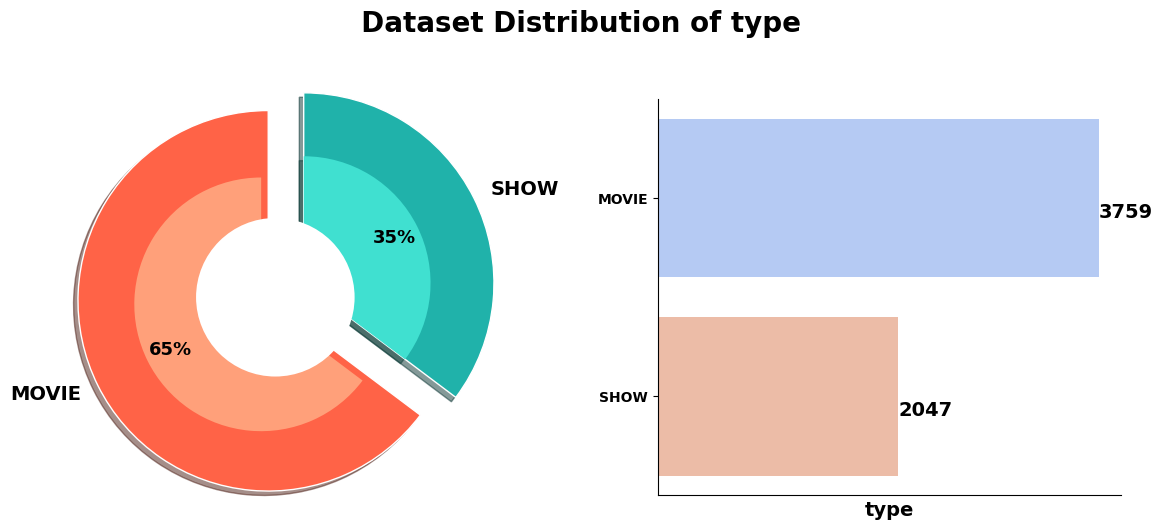

In [ ]:
plot_count(df, ['type'], ' ')

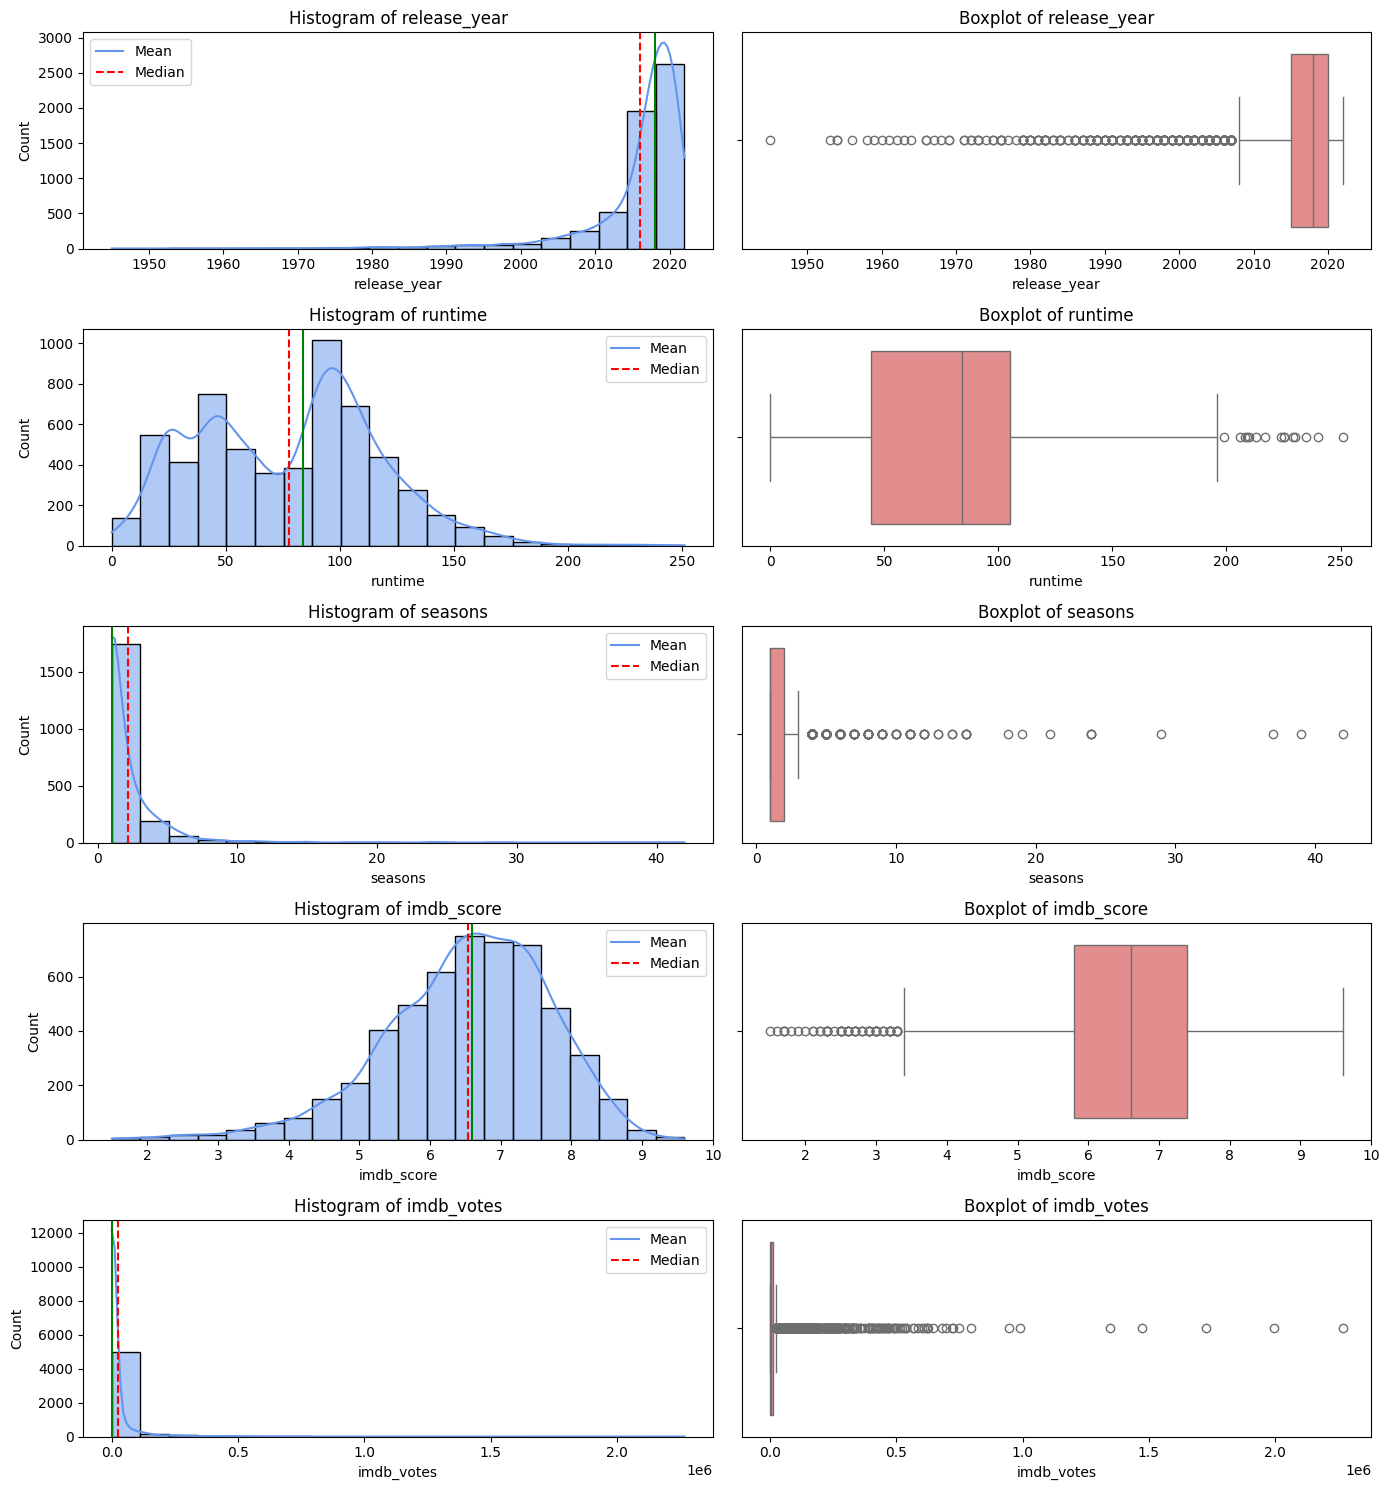

In [ ]:
features = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes']

num_cols_count = len(features)
n_rows = num_cols_count

fig, axs = plt.subplots(n_rows, 2, figsize=(14, n_rows*3))

for idx, col in enumerate(features):

    # Plot histogram
    sns.histplot(data=df, x=col, kde=True, ax=axs[idx, 0], color='cornflowerblue', bins=20)
    axs[idx, 0].set_title(f'Histogram of {col}')
    axs[idx, 0].axvline(df[col].mean(), color='red', linestyle='--')  # mean
    axs[idx, 0].axvline(df[col].median(), color='green', linestyle='-')  # median
    axs[idx, 0].legend({'Mean':df[col].mean(), 'Median':df[col].median()})
    sns.boxplot(data=df, x=col, ax=axs[idx, 1], color='lightcoral')
    axs[idx, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
import collections
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def Plot_world(text):

    comment_words = ' '
    stopwords = set(STOPWORDS)

    for val in text:
        val = str(val)
        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            comment_words = comment_words + words + ' '

    wordcloud = WordCloud(width = 5000,
                          height = 3000,
                          background_color = 'white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(comment_words)

    plt.figure(figsize=(14, 8))
    plt.imshow(wordcloud)
    plt.axis('off')

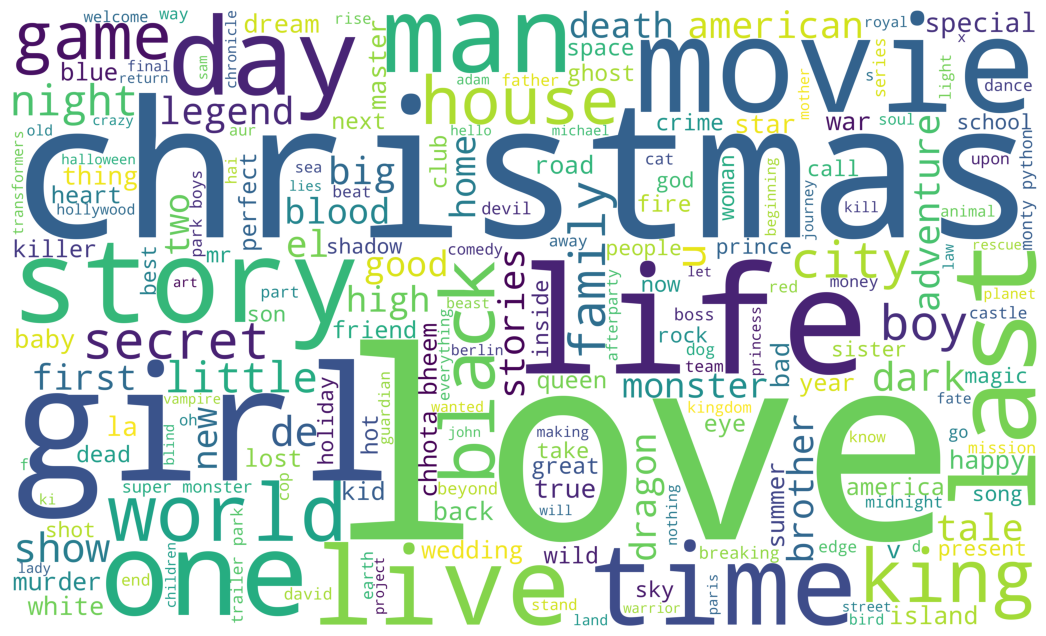

In [ ]:
text = df.title.values
Plot_world(text)

# **Netflix Movies and Shows**

Decoding Trends in Entertainment: A Deep Dive into Netflix's Content Library

## **About Dataset**

**Description:**

This dataset provides a comprehensive view of movies and shows available on Netflix. It captures a range of information, offering insights into the type of content, its popularity, and other significant aspects. This dataset is ideal for exploring trends in entertainment, understanding preferences among different age groups, and conducting comparative analysis of genres and production locations.


**Features:**

**title:** The name of the movie or show, an essential identifier.

**type:** Distinguishes between a movie and a show, indicating the format of the content.

**release_year:** The year the content was released, providing a temporal context.

**age_certification:** Indicates the age suitability rating, important for audience targeting.

**runtime:** Duration of the movie or show in minutes, reflecting content length.

**genres:** Categories of the content, such as comedy, drama, or horror, crucial for understanding its theme.

**production_countries:** The countries where the content was produced, highlighting geographical influences.

**seasons:** Number of seasons (applicable for shows), indicating the extent of the content.

**imdb_id:** A unique identifier for each title on IMDb, useful for cross-referencing.

**imdb_score:** The IMDb rating of the content, reflecting its popularity and quality.

**imdb_votes:** The number of votes the content received on IMDb, indicative of viewer engagement and popularity.

**Use Case:**

This dataset is invaluable for tasks like trend analysis in entertainment, predictive modeling for viewer preferences, and comparative studies of genres and release years. It allows for an in-depth understanding of the factors that contribute to the success and popularity of movies and shows on Netflix.

**Note:**

The dataset is a rich resource for researchers and analysts in the field of entertainment and media studies.

It can be used to correlate various features like genre, release year, and IMDb scores to understand audience preferences and trends over time.